<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/forwardNN_n250_rawdata_seed2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# 必要なライブラリのimport
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [65]:
# データの準備、読み込み


## データファイルのpath(位置データはrawの方)
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data_raw.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data_raw.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data_raw.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data_raw.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data_raw.csv'


## csvファイルをリスト化

### 穴なしの温度分布データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))
lst_f0 = [r[:-1] for r in lst_f0]

### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

In [66]:
# model_1

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
n = 250                    #nは総抽出データ数
train = 0.8                 #train:validのtrainデータの割合
seed = 2                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 大きさデータを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)


### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [67]:
lst_x_fp_train.shape

(200, 2)

In [68]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

# モデル定義とコンパイル
model_1 = Model(inputs=[x.input, y.input], outputs=z)
model_1.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [69]:
# 学習
epochs = 2000
batch_size = 32
history_1 = model_1.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
7/7 [==============================] - 1s 38ms/step - loss: 0.2466 - mae: 0.2248 - val_loss: 0.3251 - val_mae: 0.2159
Epoch 2/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.3098 - mae: 0.2014 - val_loss: 0.3188 - val_mae: 0.1940
Epoch 3/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.4409 - mae: 0.2136 - val_loss: 0.3132 - val_mae: 0.1814
Epoch 4/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.1784 - mae: 0.1633 - val_loss: 0.3023 - val_mae: 0.1750
Epoch 5/2000
7/7 [==============================] - 0s 12ms/step - loss: 0.1832 - mae: 0.1628 - val_loss: 0.2915 - val_mae: 0.1740
Epoch 6/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.1907 - mae: 0.1575 - val_loss: 0.2815 - val_mae: 0.1657
Epoch 7/2000
7/7 [==============================] - 0s 13ms/step - loss: 0.1491 - mae: 0.1396 - val_loss: 0.2804 - val_mae: 0.1653
Epoch 8/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.1534 - m

In [70]:
# モデルの評価
score = model_1.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

309/309 [==============================] - 1s 2ms/step - loss: 0.1109 - mae: 0.0623
Test loss: 0.11092383414506912
Test mae: 0.06230518966913223


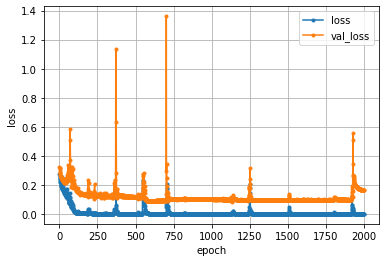

In [71]:
# 学習経過の可視化
loss     = history_1.history['loss']
val_loss = history_1.history['val_loss']

nb_epoch = len(loss)
for i in range(50):
  if max(loss)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
      plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
      break
    else:
      loss = loss[1:]
      val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

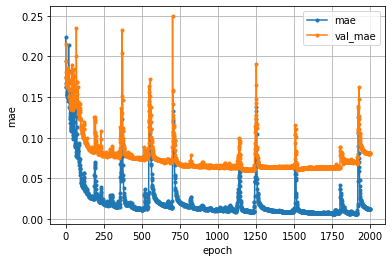

In [72]:
# 学習経過の可視化
mae     = history_1.history['mae']
val_mae = history_1.history['val_mae']

nb_epoch = len(mae)
for i in range(50):
  if max(mae)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
      plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
      break
    else:
      mae = mae[1:]
      val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [73]:
# 学習モデルの保存
model_1.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [74]:
# model_2

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.5                 #train:validのtrainデータの割合                      
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [75]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_2 = Model(inputs=[x.input, y.input], outputs=z)
model_2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [76]:
# 学習
epochs = 2000
batch_size = 32
history_2 = model_2.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
4/4 [==============================] - 1s 70ms/step - loss: 0.1331 - mae: 0.2208 - val_loss: 0.4523 - val_mae: 0.2497
Epoch 2/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.1289 - mae: 0.1979 - val_loss: 0.4584 - val_mae: 0.2410
Epoch 3/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.1112 - mae: 0.1803 - val_loss: 0.4668 - val_mae: 0.2358
Epoch 4/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0976 - mae: 0.1732 - val_loss: 0.4606 - val_mae: 0.2209
Epoch 5/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0959 - mae: 0.1577 - val_loss: 0.4558 - val_mae: 0.2070
Epoch 6/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0914 - mae: 0.1440 - val_loss: 0.4599 - val_mae: 0.2028
Epoch 7/2000
4/4 [==============================] - 0s 99ms/step - loss: 0.0865 - mae: 0.1442 - val_loss: 0.4580 - val_mae: 0.1967
Epoch 8/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0792 - m

In [77]:
# モデルの評価
score = model_2.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

309/309 [==============================] - 1s 2ms/step - loss: 0.2886 - mae: 0.0956
Test loss: 0.28857535123825073
Test mae: 0.09561247378587723


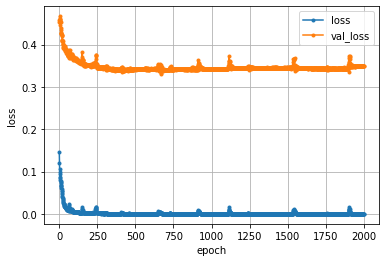

In [78]:
# 学習経過の可視化
loss     = history_2.history['loss']
val_loss = history_2.history['val_loss']

nb_epoch = len(loss)
for i in range(50):
  if max(loss)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
      plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
      break
    else:
      loss = loss[1:]
      val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

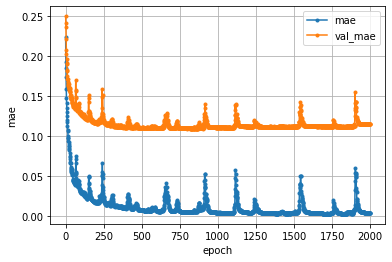

In [79]:
# 学習経過の可視化
mae     = history_2.history['mae']
val_mae = history_2.history['val_mae']

nb_epoch = len(mae)
for i in range(50):
  if max(mae)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
      plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
      break
    else:
      mae = mae[1:]
      val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [80]:
# 学習モデルの保存
model_2.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [81]:
# model_3

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.8                 #train:validのtrainデータの割合
seed = 3                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [82]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_3 = Model(inputs=[x.input, y.input], outputs=z)
model_3.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [83]:
# 学習
epochs = 2000
batch_size = 32
history_3 = model_3.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
7/7 [==============================] - 1s 37ms/step - loss: 0.2988 - mae: 0.2620 - val_loss: 0.5346 - val_mae: 0.3147
Epoch 2/2000
7/7 [==============================] - 0s 12ms/step - loss: 0.2981 - mae: 0.2536 - val_loss: 0.5389 - val_mae: 0.3129
Epoch 3/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.3562 - mae: 0.2502 - val_loss: 0.5312 - val_mae: 0.2985
Epoch 4/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.3092 - mae: 0.2367 - val_loss: 0.5338 - val_mae: 0.2915
Epoch 5/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.1701 - mae: 0.1860 - val_loss: 0.5396 - val_mae: 0.2782
Epoch 6/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.2835 - mae: 0.1989 - val_loss: 0.5279 - val_mae: 0.2749
Epoch 7/2000
7/7 [==============================] - 0s 12ms/step - loss: 0.3008 - mae: 0.1934 - val_loss: 0.5468 - val_mae: 0.2760
Epoch 8/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.1631 - m

In [84]:
# モデルの評価
score = model_3.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

309/309 [==============================] - 0s 1ms/step - loss: 0.0997 - mae: 0.0578
Test loss: 0.09967915713787079
Test mae: 0.057789817452430725


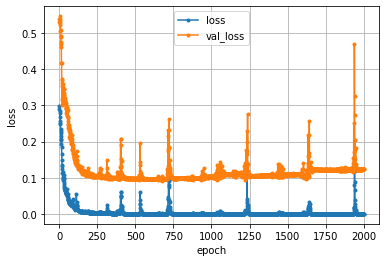

In [85]:
# 学習経過の可視化
loss     = history_3.history['loss']
val_loss = history_3.history['val_loss']

nb_epoch = len(loss)
for i in range(50):
  if max(loss)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
      plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
      break
    else:
      loss = loss[1:]
      val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

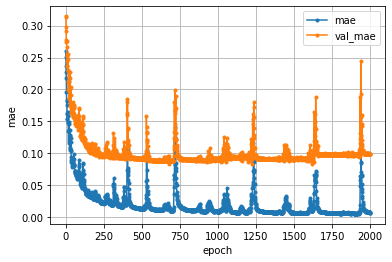

In [86]:
# 学習経過の可視化
mae     = history_3.history['mae']
val_mae = history_3.history['val_mae']

nb_epoch = len(mae)
for i in range(50):
  if max(mae)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
      plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
      break
    else:
      mae = mae[1:]
      val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [87]:
# 学習モデルの保存
model_3.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [88]:
# model_4

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.5                 #train:validのtrainデータの割合                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [89]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_4 = Model(inputs=[x.input, y.input], outputs=z)
model_4.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [90]:
# 学習
epochs = 2000
batch_size = 32
history_4 = model_4.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
4/4 [==============================] - 1s 75ms/step - loss: 0.2490 - mae: 0.2717 - val_loss: 0.4876 - val_mae: 0.2984
Epoch 2/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.1724 - mae: 0.2350 - val_loss: 0.4866 - val_mae: 0.2927
Epoch 3/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.1868 - mae: 0.2295 - val_loss: 0.4831 - val_mae: 0.2850
Epoch 4/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.2042 - mae: 0.2194 - val_loss: 0.4798 - val_mae: 0.2796
Epoch 5/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.1664 - mae: 0.2068 - val_loss: 0.4814 - val_mae: 0.2823
Epoch 6/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.1582 - mae: 0.2111 - val_loss: 0.4722 - val_mae: 0.2755
Epoch 7/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.2039 - mae: 0.2196 - val_loss: 0.4607 - val_mae: 0.2697
Epoch 8/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.2022 - m

In [91]:
# モデルの評価
score = model_4.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

309/309 [==============================] - 1s 2ms/step - loss: 0.2062 - mae: 0.0818
Test loss: 0.206180140376091
Test mae: 0.08184773474931717


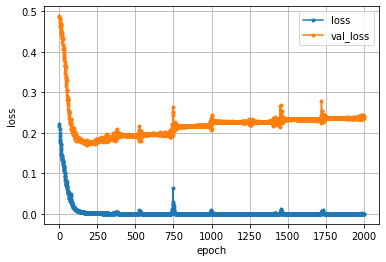

In [92]:
# 学習経過の可視化
loss     = history_4.history['loss']
val_loss = history_4.history['val_loss']

nb_epoch = len(loss)
for i in range(50):
  if max(loss)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
      plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
      break
    else:
      loss = loss[1:]
      val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

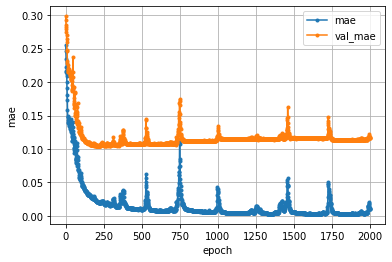

In [93]:
# 学習経過の可視化
mae     = history_4.history['mae']
val_mae = history_4.history['val_mae']

nb_epoch = len(mae)
for i in range(50):
  if max(mae)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
      plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
      break
    else:
      mae = mae[1:]
      val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [94]:
# 学習モデルの保存
model_4.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")